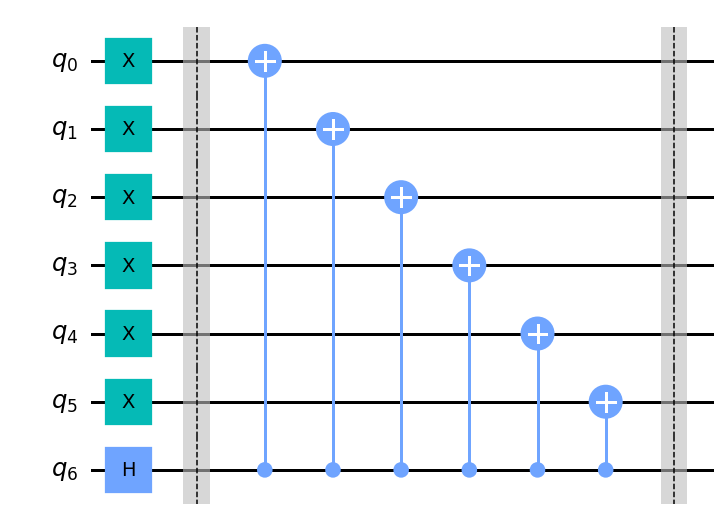

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

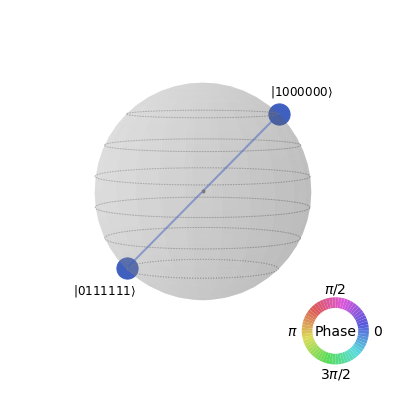

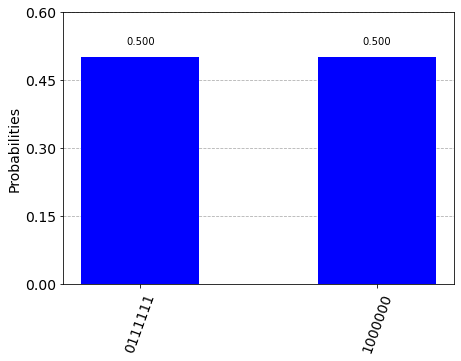

In [10]:
#quantum_circuit2.ipynb

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import (
    Aer,
    ClassicalRegister,
    QuantumCircuit,
    QuantumRegister,
    assemble,
    execute,
)
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(7)# declare circuit of 7 qubits both intialized to 0 state

#put qubit 1 into superposition at +x position
qc.h(6)
#invert all other qubits to 0 
qc.x(0)
qc.x(1)
qc.x(2)
qc.x(3)
qc.x(4)
qc.x(5)
qc.save_statevector("sv1")# save first state vector
#entangle qubit 6 with every other qubit in the system
qc.cx(6,0)
qc.cx(6,1)
qc.cx(6,2)
qc.cx(6,3)
qc.cx(6,4)
qc.cx(6,5)
qc.save_statevector()#save final state vector


result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

#two states
#00 q_1q_0 
#01 q_1q_0 q0 could be 0or 1 q_1 is only 0 because it is its initial value
display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))

display(plot_state_qsphere(sv2))

plot_histogram(counts, color="blue")